In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.2, 0.37, 0.72, 0.97, 1.34, 1.89, 2.15, 2.67])
y = np.array([0.02, 0.48, 1.80, 3.26, 6.23, 12.40, 16.04, 24.74])

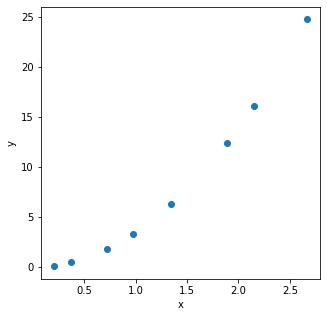

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Straight line

In [ ]:
# Find a
m = len(x)
sum_yx = np.sum(x*y)
sum_x_sum_y = np.sum(x)*np.sum(y)
sum_xx = np.sum(x**2)
sum_x2 = np.sum(x)**2

# Find b
sum_x2y = np.sum(x**2)*np.sum(y)
sum_x_sum_yx = np.sum(x)*np.sum(y*x)

a = ((m*sum_yx)-sum_x_sum_y)/((m*sum_xx)-sum_x2)
b = ((sum_x2y)-sum_x_sum_yx)/((m*sum_xx)-sum_x2)

print("a = %0.3f, and b = %0.3f" %(a, b))

a = 9.735, and b = -4.425


In [ ]:
y_pred = a*(x)+b

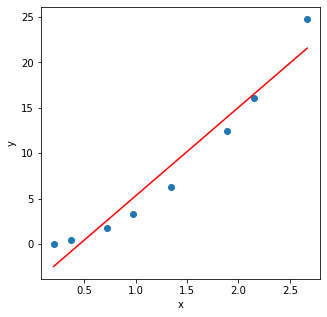

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_pred, c = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"x":x, 
                   "y":y, 
                   "y_pred":y_pred, 
                   "SSE": (y-y_pred)**2,
                   "SSR":(np.mean(y)-y_pred)**2,
                   "SST": (y-np.mean(y))**2})

print(np.sum((np.mean(y)-y_pred)**2), np.sum((y-np.mean(y))**2))
print("R-square = %0.3f"%(np.sum((np.mean(y)-y_pred)**2)/np.sum((y-np.mean(y))**2)))
df

518.2684863191007 548.3828874999999
R-square = 0.945


,x,y,y_pred,SSE,SSR,SST
0,0.20,0.02,-2.478116,6.240585,112.346565,65.630252
1,0.37,0.48,-0.823106,1.698086,80.001507,58.388702
2,0.72,1.80,2.584268,0.615076,30.658174,39.958202
3,0.97,3.26,5.018106,3.090937,9.629502,23.631752
4,1.34,6.23,8.620187,5.712993,0.248938,3.576827
5,1.89,12.40,13.974631,2.479464,34.262073,18.307702
6,2.15,16.04,16.505823,0.216991,70.301069,62.706602
7,2.67,24.74,21.568207,10.060270,180.820658,276.182852


In [ ]:
np.sum(df, axis=0)

x          10.310000
y          64.970000
y_pred     64.970000
SSE        30.114401
SSR       518.268486
SST       548.382887
dtype: float64

# Power curve

In [ ]:
def a_power(n): 
  sum_yxn = np.sum(y*(x**n))
  sum_xn = np.sum(x**(2*n))
  a = sum_yxn/sum_xn
  return a

In [ ]:
y_pred_power1_x2 = a_power(1)*(x**2)
y_pred_power2_x2 = a_power(2)*(x**2)
y_pred_power3_x2 = a_power(3)*(x**2)

In [ ]:
print(a_power(2))

3.470299868822228


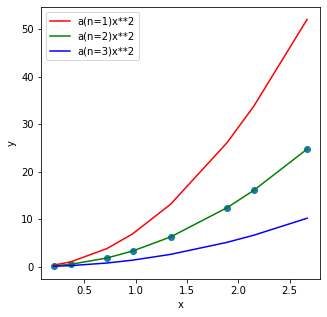

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_pred_power1_x2, c = "red", label = "a(n=1)x**2")
plt.plot(x, y_pred_power2_x2, c = "green", label = "a(n=2)x**2")
plt.plot(x, y_pred_power3_x2, c = "blue", label = "a(n=3)x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
df_power = pd.DataFrame({"x":x, 
                        "y":y, 
                        "y_pred":y_pred_power2_x2, 
                        "SSE": (y-y_pred_power2_x2)**2,
                        "SSR":(np.mean(y)-y_pred_power2_x2)**2,
                        "SST": (y-np.mean(y))**2})

print(np.sum((np.mean(y)-y_pred_power2_x2)**2), np.sum((y-np.mean(y))**2))
print("R-square = %0.3f"%(np.sum((np.mean(y)-y_pred_power2_x2)**2)/np.sum((y-np.mean(y))**2)))
df_power

546.4762038763239 548.3828874999999
R-square = 0.997


,x,y,y_pred,SSE,SSR,SST
0,0.20,0.02,0.138812,1.411629e-02,63.719317,65.630252
1,0.37,0.48,0.475084,2.416654e-05,58.463854,58.388702
2,0.72,1.80,1.799003,9.931079e-07,39.970801,39.958202
3,0.97,3.26,3.265205,2.709355e-05,23.581172,23.631752
4,1.34,6.23,6.231270,1.614029e-06,3.572023,3.576827
5,1.89,12.40,12.396258,1.400136e-05,18.275695,18.307702
6,2.15,16.04,16.041461,2.134941e-06,62.729745,62.706602
7,2.67,24.74,24.739421,3.355481e-07,276.163599,276.182852


In [ ]:
np.sum(df_power, axis=0)

x          10.310000
y          64.970000
y_pred     65.086515
SSE         0.014187
SSR       546.476204
SST       548.382887
dtype: float64

# exponential

In [ ]:
# Find A
m = len(x)
sum_lnyx = np.sum(x*np.log(y))
sum_x_sum_lny = np.sum(x)*np.sum(np.log(y))
sum_xx = np.sum(x**2)
sum_x2 = np.sum(x)**2

# Find ln B
sum_x2lny = np.sum(x**2)*np.sum(np.log(y))
sum_x_sum_lnyx = np.sum(x)*np.sum(np.log(y)*x)

A = ((m*sum_lnyx)-sum_x_sum_lny)/((m*sum_xx)-sum_x2)
B = ((sum_x2lny)-sum_x_sum_lnyx)/((m*sum_xx)-sum_x2)

print("a = %0.3f, and b = %0.3f" %(A, np.e**B))

a = 2.314, and b = 0.129


In [ ]:
y_pred_expo = (np.e**B)*(np.e**(A*x))

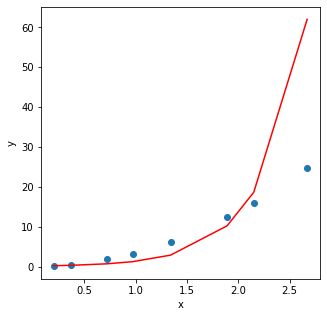

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_pred_expo, c = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
df_expo = pd.DataFrame({"x":x, 
                        "y":y, 
                        "y_pred":y_pred_expo, 
                        "SSE": (y-y_pred_expo)**2,
                        "SSR":(np.mean(y)-y_pred_expo)**2,
                        "SST": (y-np.mean(y))**2})

print(np.sum((np.mean(y)-y_pred_expo)**2), np.sum((y-np.mean(y))**2))
print("R-square = %0.3f"%(np.sum((np.mean(y)-y_pred_expo)**2)/np.sum((y-np.mean(y))**2)))
df_expo

3274.597953361865 548.3828874999999
R-square = 5.971


,x,y,y_pred,SSE,SSR,SST
0,0.20,0.02,0.204490,0.034037,62.675088,65.630252
1,0.37,0.48,0.303033,0.031317,61.124517,58.388702
2,0.72,1.80,0.681041,1.252068,55.356704,39.958202
3,0.97,3.26,1.214440,4.184315,47.704023,23.631752
4,1.34,6.23,2.858617,11.366226,27.695310,3.576827
5,1.89,12.40,10.204732,4.819202,4.340897,18.307702
6,2.15,16.04,18.623113,6.672474,110.289132,62.706602
7,2.67,24.74,62.023126,1390.031516,2905.412282,276.182852


In [ ]:
np.sum(df_expo, axis=0)

x           10.310000
y           64.970000
y_pred      96.112593
SSE       1418.391155
SSR       3274.597953
SST        548.382887
dtype: float64

# Polyfit

In [ ]:
poly_model2 = np.poly1d(np.polyfit(x, y, 2))
print(np.polyfit(x, y, 2))
poly_model3 = np.poly1d(np.polyfit(x, y, 3))
print(np.polyfit(x, y, 3))
poly_model4 = np.poly1d(np.polyfit(x, y, 4))
print(np.polyfit(x, y, 4))

[ 3.43729411  0.11571548 -0.08631359]
[ 0.04112172  3.26124469  0.31907967 -0.13857406]
[-0.08236466  0.51544934  2.372496    0.91472228 -0.24321363]


In [ ]:
y_pred_poly2 = poly_model2(x)
y_pred_poly3 = poly_model3(x)
y_pred_poly4 = poly_model4(x)

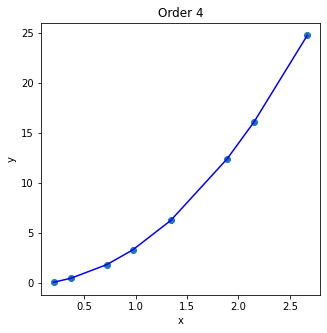

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_pred_poly4, c = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Order 4") 
plt.show()

In [ ]:
df_poly = pd.DataFrame({"x":x, 
                        "y":y, 
                        "y_pred":y_pred_poly2, 
                        "SSE": (y-y_pred_poly2)**2,
                        "SSR":(np.mean(y)-y_pred_poly)**2,
                        "SST": (y-np.mean(y))**2})

print(np.sum((np.mean(y)-y_pred_poly2)**2), np.sum((y-np.mean(y))**2))
print("R-square = %0.3f"%(np.sum((np.mean(y)-y_pred_poly2)**2)/np.sum((y-np.mean(y))**2)))
df_poly

548.3761540979458 548.3828874999999
R-square = 1.000


,x,y,y_pred,SSE,SSR,SST
0,0.20,0.02,0.074321,2.950801e-03,65.047925,65.630252
1,0.37,0.48,0.427067,2.801934e-03,59.185592,58.388702
2,0.72,1.80,1.778895,4.454286e-04,39.994353,39.958202
3,0.97,3.26,3.260080,6.471992e-09,23.467058,23.631752
4,1.34,6.23,6.240750,1.155721e-04,3.524718,3.576827
5,1.89,12.40,12.410747,1.154967e-04,18.235910,18.307702
6,2.15,16.04,16.051367,1.292016e-04,62.567844,62.706602
7,2.67,24.74,24.726773,1.749619e-04,276.354828,276.182852


In [ ]:
np.sum(df_poly, axis=0)

x          10.310000
y          64.970000
y_pred     64.970000
SSE         0.006733
SSR       548.378228
SST       548.382887
dtype: float64

# Summary

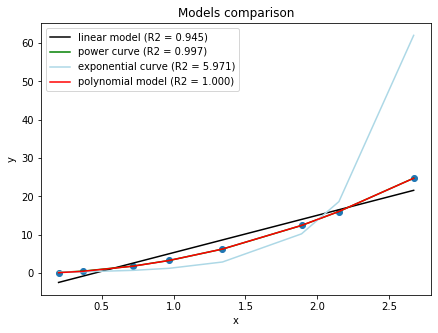

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.plot(x, y_pred, c = "black", label = "linear model (R2 = 0.945)")
plt.plot(x, y_pred_power2_x2, c = "green", label = "power curve (R2 = 0.997)")
plt.plot(x, y_pred_expo, c = "lightblue", label = "exponential curve (R2 = 5.971)")
plt.plot(x, y_pred_poly2, c = "red", label = "polynomial model (R2 = 1.000)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Models comparison") 
plt.show()